# Precept 3: Matrix norms and SVD
## Task 1: Matrix norms

The matrix A $\in \mathbb{R}^{n\times n} $ defined by:
$$
A = \frac{1}{n+1}\begin{bmatrix}
0 & -1 & &   & &  \\
1 & 0 & -1  &  & &  \\
  & 1 & 0 & -1  & &  \\
& & \ddots & \ddots & \ddots & \\
 & & &1  & 0 & -1 \\
  & & & & 1 & 0 \\
\end{bmatrix}
$$
is called the first-order central difference matrix.

Derive (by hand) its operator 1-norm, operator $\infty$-norm and Frobenius norm. Compute its operator 2-norm (with code) for n = 100. You may the function np.linalg.svd


In [1]:
import numpy as np
# Form the matrix
n = 100
A = 0 # Complete this

## Find the operator norm of A
# You may use this function np.linalg.svd
#help(np.linalg.svd)


## Task 2: SVD and eigenvalues

In class we discussed the link between the SVD of A and the eigenvalue decomposition of $A^TA$. One way to compute the SVD of A is in fact to use an algorithm for the eigenvalue decomposition of $A^TA$. It turns out there is a slightly better choice, which we explore here.

### 1. Ill conditioning
Find the condition number of $A^TA$ in terms of the condition number of $A \in \mathcal{R}^{n \times n} $. Recall that the condition number is defined as:
$$
\kappa_2(A) = \frac{\sigma_1}{\sigma_n}
$$


Why might this be bad for computation?
### 2. A better choice
Suppose $A \in \mathbb{R}^{m \times m}$ has an SVD of $A = U \Sigma V^T$. Let B be defined as:
$$
B = \begin{bmatrix}
0 &  A \\
A^T & 0 
\end{bmatrix}
$$

Verify that $B = \hat{V}\hat{\Sigma}\hat{V}^{T} $ is an eigenvalue decomposition, where:
$$
\hat{V} = \frac{1}{\sqrt{ 2 } }\begin{bmatrix}
U & U \\
V & -V \\
 \end{bmatrix} \qquad \hat{\Sigma} = \begin{bmatrix}
\Sigma & 0 \\
0 & -\Sigma \\
 \end{bmatrix}
$$


What is the condition number of $B$ in terms of the condition number of A? (Use the fact that if A is symmetric, the singular values of A are the absolute value of the eigenvalues of A)



## Task 3: Testing out task 2

Here, we implement the above algorithm for the SVD, using the algorithm for eigenvalue decomposition as a black box. We will cover algorithm for eigenvalue decomposition later in the class.

First, we generate some matrices with known condition number: $\rho^{100}$. For $ \rho \approx 1$ this is well conditioned but with $\rho$ a little bit bigger than one (say 1.2), this is highly ill conditioned. We start with $\rho = 1.01$.

condition number is: 69014978.7683452


Text(0, 0.5, 'singular values')

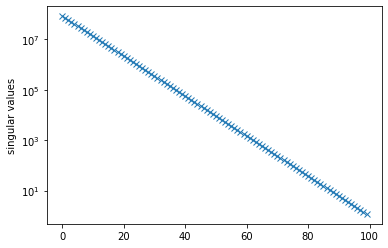

In [2]:
import matplotlib.pyplot as plt
n = 100

# Generating an ill-conditioned matrix
# Forms two random orthogonal matrix (don't worry about how this works)
U,_ = np.linalg.qr( np.random.randn(n,n) )
V,_ = np.linalg.qr( np.random.randn(n,n) )
rho = 1.01
S = rho**(np.arange(n, 0, -1)) # Geometrically growing singular values
# Form a new matrix, with random singular vectors U and Vh and the new eigenvalues
A = (U * S ) @ V.T
print('condition number is:', S[0] / S[-1])
plt.semilogy(S, 'x')
plt.ylabel('singular values')

Implement the algorithm suggested in task 2.1 in my_unstable_SVD.

Make sure it is an SVD of A: U and V are orthogonal and $A = USV^T$
In principle, we should also impose that the entries of S are decreasing but we won't worry about this.



In [2]:
# You can sue this function:
# np.linalg.eigh computes the eigenvalue decomposition for hermitian (and symmetric) matrices
#help(np.linalg.eigh)


In [4]:
## Compute the SVD of A from the eigenvalue decomposition of A.T @ A
def my_unstable_SVD(A):
    # Compute the right singular vectors and singular values
    # of A using an an eigendecomposition of A^T A
    # Then, use that U = A V D^{-1} to compute the left singular vectors
    U,S,V = np.zeros_like(A),np.zeros_like(A[:,0]),np.zeros_like(A)

    # Returns orthogonal matrices U and V, and a vector S such that A  = U @ np.diag(S) @ V.T = U*S @ V.T
    return U, S, V


def check_orthogonal(Q):
    n = Q.shape[0]
    err = np.linalg.norm(Q.T @ Q - np.eye(n)) 
    return err

U, S, V = my_unstable_SVD(A)
print("|UU.T - I| = ", check_orthogonal(U))
print("|VV.T - I| = ", check_orthogonal(V))
print("|A - USV.T| = ?", np.linalg.norm(A - (U * S) @ V.T ) / np.linalg.norm(A))

|UU.T - I| =  10.0
|VV.T - I| =  10.0
|A - USV.T| = ? 1.0


### Now repeat with a more ill conditioned matrix by setting $\rho = 1.2$ and $\rho = 1.3$ What do you notice?